# Principal Component Analysis

#### **Overview**

Principal Component Analysis (PCA) is a **linear, unsupervised dimensionality reduction technique** that transforms high-dimensional data into a lower-dimensional representation while preserving as much variance as possible. PCA identifies orthogonal directions of maximum variance in the data.

This notebook demonstrates the application of a custom PCA implementation to a high-dimensional dataset. The example highlights the importance of **data centering, eigenvalue decomposition, and variance explained** in dimensionality reduction.

The goals of this notebook are to:
 - Understand the geometric interpretation of PCA
 - Explore variance preservation and dimensionality trade-offs
 - Apply PCA implemented from scratch
 - Visualize data in reduced-dimensional (2D) space

In [1]:
import sys
import os
from pathlib import Path

# Add the project root's 'src' directory to the Python path
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, os.pardir))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added project source directory to sys.path: {src_path}")

Added project source directory to sys.path: /Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA

# Import functions from src
from rice_ml.processing.preprocessing import (get_features,
                                              get_feature_types,
                                              create_preprocessor)
from rice_ml.unsupervised_learning.pca import (train_pca,
                                               plot_explained_variance,
                                               get_pca_loadings,
                                               plot_pca_2d,
                                               plot_pca_by_label)

In [3]:
# set data path 
repo_root = Path("/Users/doriolson/Desktop/repos/CMOR_438_Final_Repository")
data_path = Path("../../../Data/Obesity_DataSet.csv")

# load dataset
df = pd.read_csv(data_path)

In [4]:
# preprocessing
# Prepare features
X = get_features(df)

# Feature types
num_features, cat_features = get_feature_types()

# Preprocessing
preprocessor = create_preprocessor(num_features, cat_features)
X_processed = preprocessor.fit_transform(X)

Next, we train the PCA model! The training standardizes all of the variables using linear algebra so that they can be compared and consolidated into components.

In [5]:
# Train PCA
pca, X_pca = train_pca(X_processed)

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value enc

## Visualizations

This first graph evaluates how many principal components we could reasonably include in a simplified version of the data. The graph shows that 80% of variance is explained within the first 5 variables, indicating there is a lot of overlap within the variables and there is definitely room for the model to simplify some of these variables into fewer components. We can certainly reduce the number of components given the results of this graph, and thus the next steps will look at just two components.

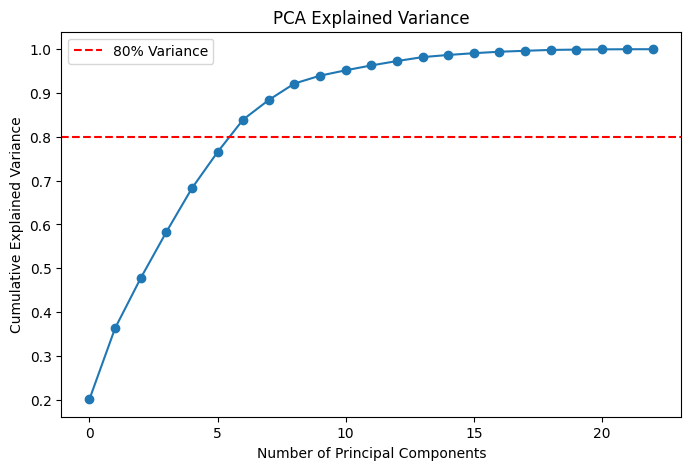

In [6]:
plot_explained_variance(pca)

We need to determine which variables should be attributed to which of the two components we are hoping to create next. The feature loadings table below shows to what extent each of the variables contribute to the primary components (PC1 and PC2).

PC1, or the component with the strongest impacts, seems to measure lifestyle and body mass, and is most impacted by: weight, height, frequency of physical activity, and dietary behaviors.

PC2 seems to be centered around consumption habits, and is most impacted by: hydration habits, transportation, and type spent sitting.

In [7]:
# PCA feature loadings
feature_names = (
    num_features +
    list(preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features))
)

loadings = get_pca_loadings(pca, feature_names)
print(loadings.sort_values("PC1", key=abs, ascending=False).head(10))

                                         PC1       PC2
Height                              0.594367 -0.129654
Weight                              0.528341  0.317064
CH2O                                0.354452 -0.092275
NCP                                 0.299293 -0.149431
FAF                                 0.262257 -0.399299
Gender_Male                         0.161611 -0.059855
FCVC                                0.130494  0.228184
family_history_with_overweight_yes  0.112076  0.071046
CAEC_Sometimes                      0.076738  0.059018
CALC_no                            -0.075635 -0.065081


We create a 2 dimensional graph of these two primary components. The fact that the data is spread further along the x axis (PC1) rather than the y axis (PC2) indicates that the components of PC1 has a larger impact on the data.

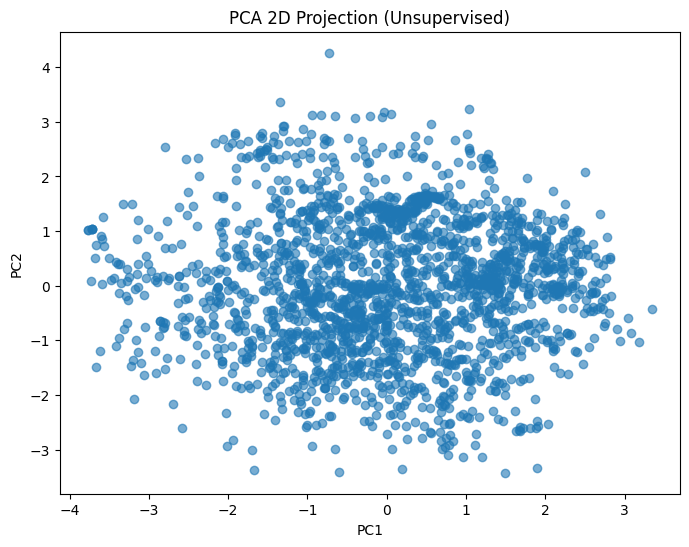

In [8]:
plot_pca_2d(X_pca)

Finally, you can see how the simplified model still accurately aligns with the data. The different obesity categories are loosely clustered along the x axis, or according to principal component 1. This shows that the model successfully simplified the variables into components that still maintained the integrity of the data.

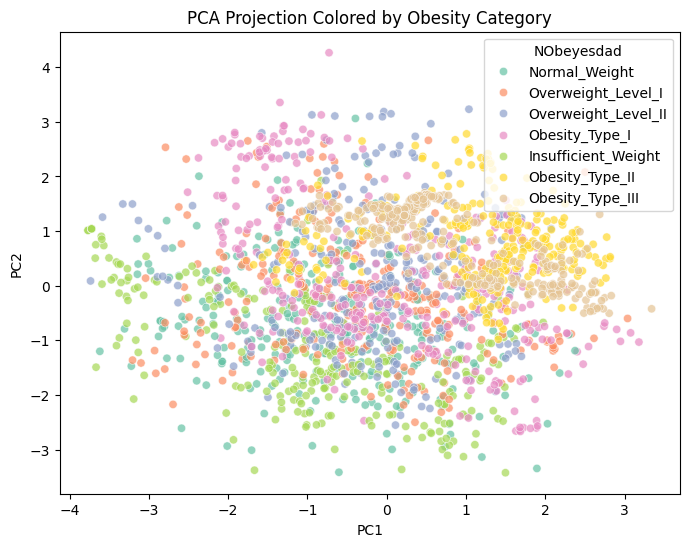

In [9]:
plot_pca_by_label(X_pca, df["NObeyesdad"])